# Fetching Fear & Greed Data 2023

In [142]:
import requests

In [143]:
response = requests.get("https://production.dataviz.cnn.io/index/fearandgreed/graphdata/")

In [144]:
print(response.status_code)
#print(response.json())

418


In [145]:
type(response)

requests.models.Response

In [146]:
response

<Response [418]>

In [147]:
print(response.content) # The server blocks the attempt to fetch data

b"I'm a teapot. You're a bot."


The attempt to simply fetch the json file was detected by the server. Therefore we have to pretend to be "another user" which looks like a real user instead of a bot. In order to achieve this,we will import fake_useragent library and use random user from the list.

In [148]:
import requests, csv, json, urllib
import pandas as pd
import time
from fake_useragent import UserAgent
import datetime

In [149]:
BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata/"
START_DATE = '2020-09-19' ### you may need to change the dates,Fear and Greed values are not stored indefinitely 
END_DATE = '2023-10-10' ####therefore if it is not working select newer dates
agent = UserAgent()

headers = {
   'User-Agent': agent.random,
   }

response = requests.get(BASE_URL + START_DATE, headers = headers)
data = response.json()

In [150]:
data # let's view the data!

{'fear_and_greed': {'score': 24.8405315614618,
  'rating': 'extreme fear',
  'timestamp': '2023-10-23T09:51:46+00:00',
  'previous_close': 25.781512605042,
  'previous_1_week': 35.4857142857143,
  'previous_1_month': 34.2787456445993,
  'previous_1_year': 43.74285714285715},
 'fear_and_greed_historical': {'timestamp': 1698054706000.0,
  'score': 24.8405315614618,
  'rating': 'extreme fear',
  'data': [{'x': 1600646400000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1600732800000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1600819200000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1600905600000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1600992000000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1601251200000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1601337600000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1601424000000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1601510400000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x': 1601596800000.0, 'y': 50.0, 'rating': 'neutral'},
   {'x':

In [151]:
jsonFile = open(r"C:\Users\vilob\OneDrive\Počítač\Projekty\Fear and Greed Scraper\Fear_Greed.json", "w")
data_json = json.dumps(data)
jsonFile.write(data_json)
jsonFile.close()

If We open the data in a separate JSON viewer (for example https://jsonviewer.stack.hu/#http://) we can see the structure of a JSON, our goal is to select the main components of Fear and Greed Index and structure them in a pandas dataframe.
<div>
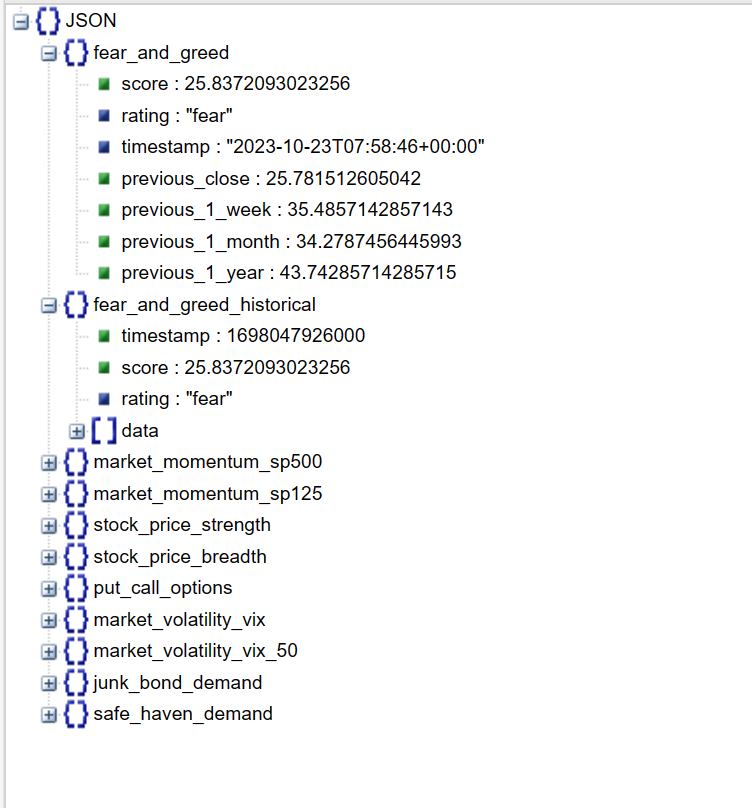
</div>

## Formatting JSON Data

In [152]:
type(data) # data is a dictionary,so we can access its elements accordingly

dict

#### Right now we want to begin with the historical values of Fear and Greed which are stored under "Data" as depicted on the picture
<div>
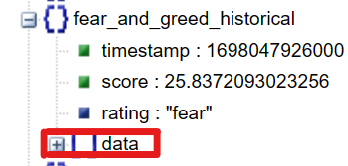
</div>

For the purpose of checking the timestamp conversion, you may use for online UNIX timestamp converters,such as https://www.epochconverter.com/

In [153]:
data["fear_and_greed_historical"]["data"][0]# data consists of x(timestamp),y(FG value) and rating(extreme fear,fear,neutral,gred,extreme greed)

{'x': 1600646400000.0, 'y': 50.0, 'rating': 'neutral'}

In [154]:
len(data["fear_and_greed_historical"]["data"])  #there are 778 entries

778

In [155]:
FG_Historical_Data = pd.DataFrame.from_dict(data["fear_and_greed_historical"]["data"])

In [156]:
FG_Historical_Data

,x,y,rating
0,1.600646e+12,50.000000,neutral
1,1.600733e+12,50.000000,neutral
2,1.600819e+12,50.000000,neutral
3,1.600906e+12,50.000000,neutral
4,1.600992e+12,50.000000,neutral
...,...,...,...
773,1.697501e+12,35.485714,fear
774,1.697674e+12,29.739496,fear
775,1.697760e+12,24.757475,extreme fear
776,1.698019e+12,24.840532,extreme fear


In [157]:
FG_Historical_Data = FG_Historical_Data.rename(columns={"x": "Date", "y": "FG Value"})
for i in range(0,len(FG_Historical_Data["Date"])):
    FG_Historical_Data["Date"][i] = datetime.datetime.fromtimestamp(((FG_Historical_Data["Date"][i])/1000))
    

C:\Users\vilob\AppData\Local\Temp\ipykernel_25376\1056899852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FG_Historical_Data["Date"][i] = datetime.datetime.fromtimestamp(((FG_Historical_Data["Date"][i])/1000))


In [158]:
FG_Historical_Data

,Date,FG Value,rating
0,2020-09-21 02:00:00,50.000000,neutral
1,2020-09-22 02:00:00,50.000000,neutral
2,2020-09-23 02:00:00,50.000000,neutral
3,2020-09-24 02:00:00,50.000000,neutral
4,2020-09-25 02:00:00,50.000000,neutral
...,...,...,...
773,2023-10-17 02:00:00,35.485714,fear
774,2023-10-19 02:00:00,29.739496,fear
775,2023-10-20 02:00:00,24.757475,extreme fear
776,2023-10-23 02:00:00,24.840532,extreme fear


Now we will add the remaining Fear and Greed components to the dataframe

In [159]:
components_names= ["put_call_options","stock_price_strength","stock_price_breadth","market_volatility_vix","market_volatility_vix_50","junk_bond_demand","safe_haven_demand","market_momentum_sp500","market_momentum_sp125"]
for name in components_names:
    copied_columns = pd.DataFrame.from_dict(data[name]["data"])
    FG_Historical_Data[name] = copied_columns["y"]

In [160]:
FG_Historical_Data

,Date,FG Value,rating,put_call_options,stock_price_strength,stock_price_breadth,market_volatility_vix,market_volatility_vix_50,junk_bond_demand,safe_haven_demand,market_momentum_sp500,market_momentum_sp125
0,2020-09-21 02:00:00,50.000000,neutral,0.671277,2.109695,1003.024020,27.78,25.2862,2.109300,-4.250120,3281.06,3095.01144
1,2020-09-22 02:00:00,50.000000,neutral,0.681688,1.956149,953.320319,26.86,25.1796,2.140200,-3.841668,3315.57,3101.73152
2,2020-09-23 02:00:00,50.000000,neutral,0.704004,1.774949,869.614184,28.58,25.1608,2.154800,-7.489870,3236.92,3106.58632
3,2020-09-24 02:00:00,50.000000,neutral,0.726122,1.526890,805.837768,28.51,25.1758,2.156700,-7.853679,3246.59,3112.22728
4,2020-09-25 02:00:00,50.000000,neutral,0.725698,1.315211,767.758908,26.38,25.1434,2.177200,-6.860792,3298.46,3117.60176
...,...,...,...,...,...,...,...,...,...,...,...,...
773,2023-10-17 02:00:00,35.485714,fear,1.005071,-6.427654,330.263101,21.71,16.2744,1.707633,0.018108,4224.16,4351.71120
774,2023-10-19 02:00:00,29.739496,fear,1.005199,-7.101393,310.872728,23.03,16.4158,1.712149,0.018108,4224.16,4351.71120
775,2023-10-20 02:00:00,24.757475,extreme fear,NaN,-7.101393,310.872728,23.03,16.4158,1.712149,NaN,NaN,NaN
776,2023-10-23 02:00:00,24.840532,extreme fear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
FG_Historical_Data.to_csv(r"C:\Users\vilob\OneDrive\Počítač\Projekty\Fear and Greed Scraper\FG_Data.csv")